### Imports

In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm as cm

import seaborn as sns

from IPython.display import Image

In [126]:
df_orig = pd.read_csv('./dataset/shopping_trends_updated.csv')

### Data understanding

In [127]:
df = df_orig.copy()

In [128]:
df.shape

(3900, 18)

In [129]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [130]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [132]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [133]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [134]:
df.duplicated().sum()

0

### Data correlations

In [135]:
colors = sns.color_palette('viridis')

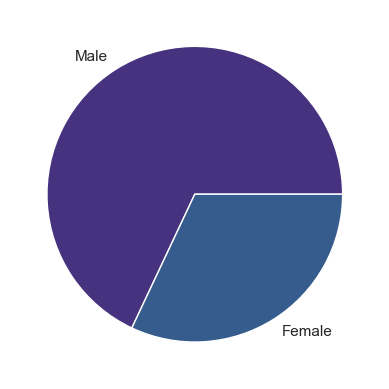

In [136]:
df['Gender'].value_counts().plot(kind='pie', colors=colors)
plt.ylabel('')
plt.show()

We can see that *women purchase less than men*, which is a valuable information. 

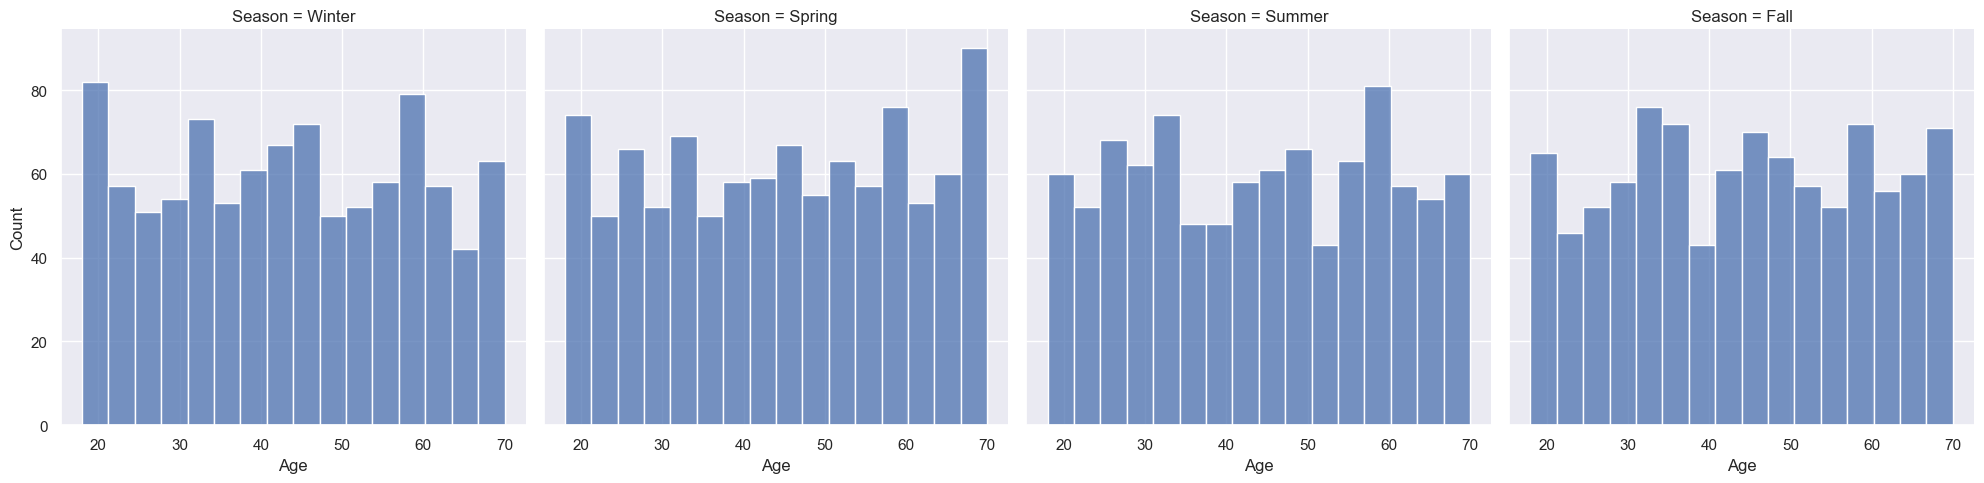

In [137]:
sns.set_theme(style="darkgrid")
sns.displot(df, x="Age", col="Season")
plt.show()

Plot of distribution of the age and gender of custommers in different seasons.

It seems like *less customers buy something in the spring*, lets plot a graph to find out

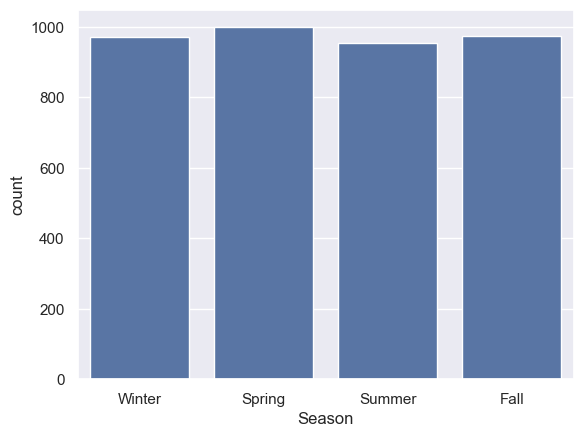

In [138]:
sns.countplot(df, x=df['Season'])
plt.show()

As it turned out, actually *the most purchases are made in the sping* and the least on summer.

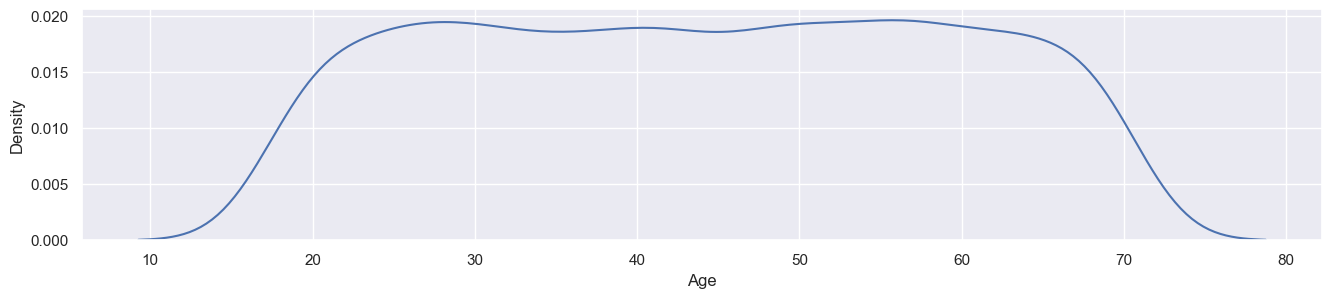

In [139]:
plt.figure(figsize=(16,3))
sns.kdeplot(df, x="Age")
plt.show()

We can see that people from ~26 to ~65 years old purchase the most

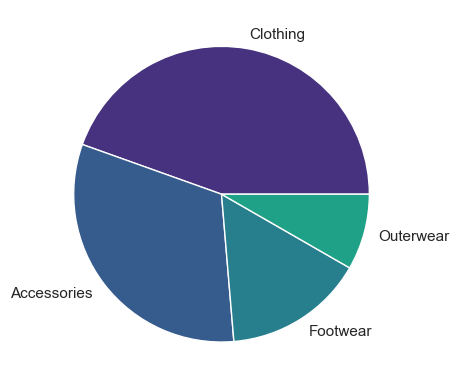

In [140]:
df['Category'].value_counts().plot(kind="pie", colors=colors)
plt.ylabel('')
plt.show()

Customers mostly buy clothing and accessories

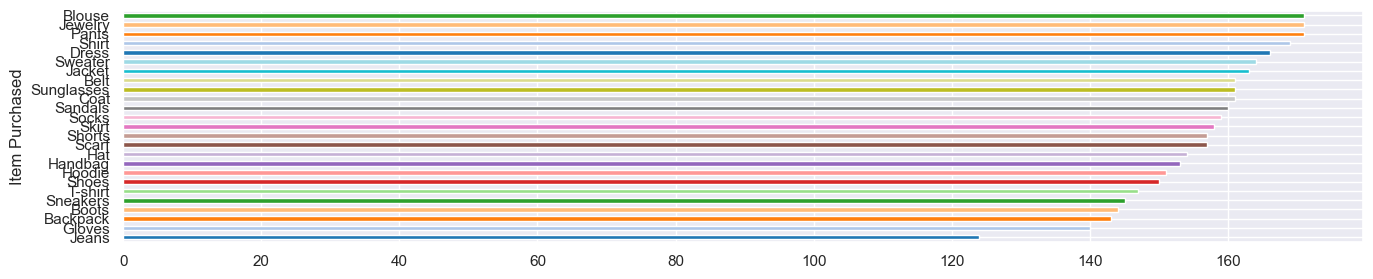

In [141]:
plt.figure(figsize=(16,3))
df['Item Purchased'].value_counts().sort_values(ascending=True).plot(kind="barh", color=sns.color_palette('tab20'))
plt.show()

Also customers mostly buy blouses, jewellery and pants

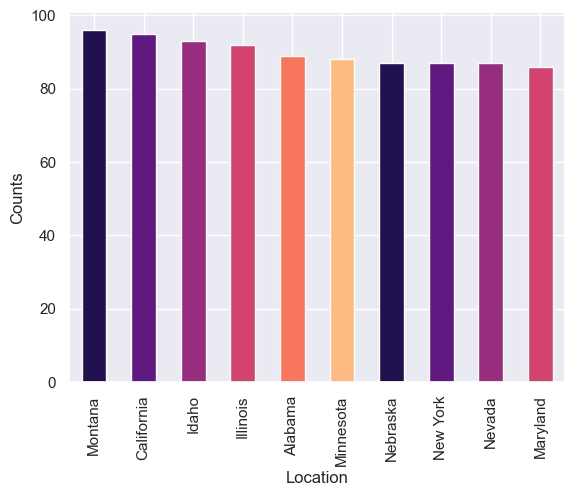

In [142]:
df['Location'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color=sns.color_palette('magma'))
plt.ylabel('Counts')
plt.show()

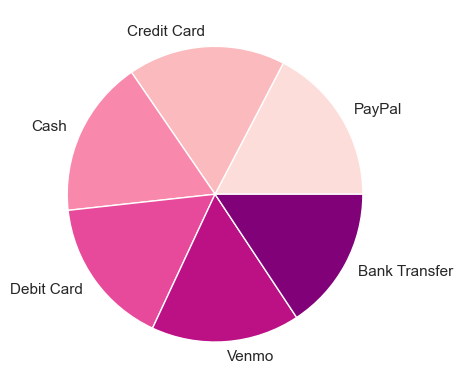

In [143]:
df['Payment Method'].value_counts().plot(kind='pie', colors=sns.color_palette('RdPu'))
plt.ylabel('')
plt.show()

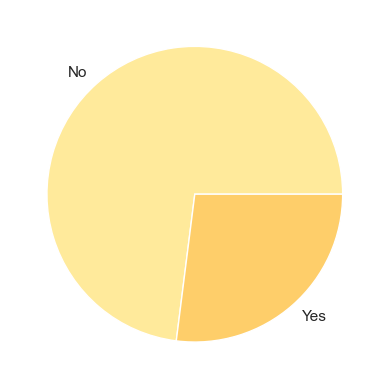

In [144]:
df['Subscription Status'].value_counts().plot(kind='pie', colors=sns.color_palette('YlOrRd'))
plt.ylabel('')
plt.show()

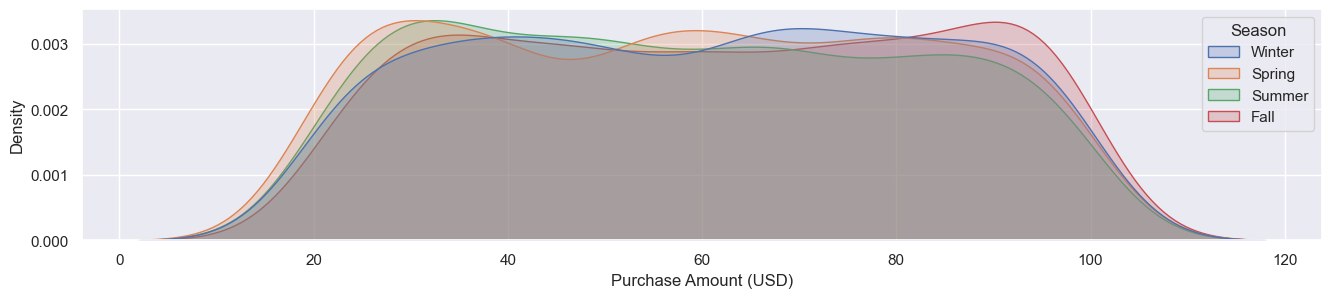

In [145]:
plt.figure(figsize=(16,3))
sns.kdeplot(df, x='Purchase Amount (USD)', hue='Season', fill=True)
plt.show()